# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 5
my_eth = 20
my_sol = 150
my_ftt = 200

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"
sol_url = "https://api.alternative.me/v2/ticker/Solana/?convert=CAD"
ftt_url = "https://api.alternative.me/v2/ticker/Ftx-token/?convert=CAD"

In [5]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_value = requests.get(btc_url).json()

# Fetch current ETH price
# YOUR CODE HERE!
eth_value = requests.get(eth_url).json()

# Fetch current Solana price
sol_value = requests.get(sol_url).json()

# Fetch Ftx data
ftx_value = requests.get(ftt_url).json()

# Compute current value of my crpto
# YOUR CODE HERE!

print(json.dumps(btc_value, indent=4))
print(json.dumps(eth_value, indent=4))
print(json.dumps(sol_value, indent=4))
print(json.dumps(ftx_value, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18812800,
            "total_supply": 18812800,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 45718.0,
                    "volume_24h": 38825711658,
                    "market_cap": 860856750868,
                    "percentage_change_1h": 0.0792891553107827,
                    "percentage_change_24h": -0.256061050600956,
                    "percentage_change_7d": -8.44322334980428,
                    "percent_change_1h": 0.0792891553107827,
                    "percent_change_24h": -0.256061050600956,
                    "percent_change_7d": -8.44322334980428
                },
                "CAD": {
                    "price": 58020.7138,
                    "volume_24h": 49273710665.1678,
               

In [6]:

# Compute current value of my crpto
# YOUR CODE HERE!

btc_value = 46019
eth_value = 3377
sol_value = 179
ftx_value = 74

my_btc_value = (my_btc * btc_value)
my_eth_value = (my_eth * eth_value)
my_sol_value = (my_sol * sol_value)
my_ftx_value = (my_ftt * ftx_value)

my_crypto_value = (my_btc_value + my_eth_value + my_sol_value + my_ftx_value)
#print current crypto wallet balance

print(f"your crypto wallet has a balance of:")
print(f"${my_btc_value} of Bitcoin")
print(f"${my_eth_value} of Etheruem")
print(f"${my_sol_value} of Solana")
print(f"${my_ftx_value} of Ftx-token")
print(f"your crypto wallet has an overall balance of ${my_crypto_value} USD")

your crypto wallet has a balance of:
$230095 of Bitcoin
$67540 of Etheruem
$26850 of Solana
$14800 of Ftx-token
your crypto wallet has an overall balance of $339285 USD


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Set current amount of shares
my_agg = 1500
my_spy = 1000

In [8]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


# Create the Alpaca API object
# YOUR CODE HERE!

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [9]:
# Format current date as ISO format
# YOUR CODE HERE!
start_date = pd.Timestamp("2021-09-09", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-10-09", tz="America/New_York").isoformat()

# Set the tickers
ticker = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!

portfolio_data = alpaca.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df
portfolio_data.index = portfolio_data.index.date
# Preview DataFrame
# YOUR CODE HERE!

portfolio_data

AGG                                         SPY          \
              open     high       low   close   volume    open    high   
2021-09-09  115.84  116.147  115.7550  116.10  3232335  450.70  452.57   
2021-09-10  115.99  116.010  115.7801  115.87  2767552  451.04  451.49   

                                      
               low   close    volume  
2021-09-09  448.72  448.94  51603442  
2021-09-10  445.31  445.50  75763259

In [10]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = 116
spy_close_price = 449
# Print AGG and SPY close prices
print(f" Agg current share price is ${agg_close_price}")
print(f" Spy current share price is ${spy_close_price}")  

 Agg current share price is $116
 Spy current share price is $449


In [11]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = (my_spy * spy_close_price)
my_agg_value = (my_agg * agg_close_price)
my_equities_value = (my_spy_value + my_agg_value)
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 1000 SPY shares is $449000.00
The current value of your 1500 AGG shares is $174000.00


### Savings Health Analysis

In [12]:
# Set monthly household income
# YOUR CODE HERE!
income =1000000
# Consolidate financial assets data
# YOUR CODE HERE!
real_estate_equity = 200000
savings = 50000
total_asset_value = (real_estate_equity+savings+my_crypto_value+my_equities_value)

total_assets = {"crypto": [my_crypto_value],
    "equities": [my_equities_value],
    "real_estate": [real_estate_equity],
    "savings": [savings]}


# Create savings DataFrame
# YOUR CODE HERE!
total_assets_df = pd.DataFrame(total_assets)

# Display savings DataFrame
total_assets_df

,crypto,equities,real_estate,savings
0,339285,623000,200000,50000


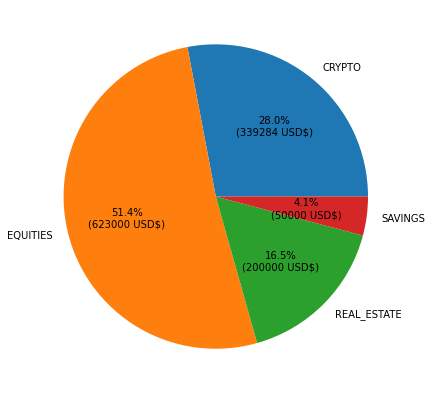

In [13]:
# Plot savings pie chart
# YOUR CODE HERE!

assets = ['CRYPTO', 'EQUITIES', 'REAL_ESTATE', 'SAVINGS']

value = [339285, 623000, 200000, 50000]

def function(pct, allvalues):
    absolute = int(pct / 100.* np.sum(allvalues))
    return "{:.1f}%\n({:d} USD$)".format(pct,absolute)

fig = plt.figure(figsize=(10,7))
plt.pie(value, labels=assets, autopct = lambda pct: function(pct, value))
plt.show()

In [14]:
# Set ideal emergency fund

monthly_income = income / (12)
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!

adjusted_assets = total_asset_value - emergency_fund

print(f" The ideal ammount to put aside for emergencies is ${emergency_fund}")
print(f" This leaves ${adjusted_assets} net assets after adjusting accordingly")



 The ideal ammount to put aside for emergencies is $250000.0
 This leaves $962285.0 net assets after adjusting accordingly


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [15]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-09-11', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-09-11', tz='America/New_York').isoformat()

In [16]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!

ticker = ['SPY', 'AGG']

df_stock_data = alpaca.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data
df_stock_data.head()

AGG                                       SPY  \
                             open    high     low    close   volume    open   
time                                                                          
2017-09-21 00:00:00-04:00  109.82  109.85  109.68  109.680  2102279  249.89   
2017-09-22 00:00:00-04:00  109.86  109.90  109.75  109.785  1325024  249.05   
2017-09-25 00:00:00-04:00  109.85  110.04  109.82  110.025  3031529  249.14   
2017-09-26 00:00:00-04:00  109.95  110.02  109.88  109.990  2074080  249.42   
2017-09-27 00:00:00-04:00  109.67  109.75  109.60  109.668  1439682  249.88   

                                                                
                               high      low   close    volume  
time                                                            
2017-09-21 00:00:00-04:00  249.9800  249.185  249.40  29220256  
2017-09-22 00:00:00-04:00  249.6300  249.020  249.42  31078666  
2017-09-25 00:00:00-04:00  249.5532  248.080  248.94  42826453  
2017-09-26 00:00:00-04:00  249.7000  248.805  249.05  36761208  
2017-09-27 00:00:00-04:00  250.4900  248.870  250.02  51473231

In [17]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

mc_30year = MCSimulation(
portfolio_data = df_stock_data,
weights= [.50, .50],
num_simulation = 500,
num_trading_days = 252*30
)


In [18]:
# Printing the simulation input data
# YOUR CODE HERE!
mc_30year.portfolio_data.head()

AGG                                    \
                             open    high     low    close   volume   
time                                                                  
2017-09-21 00:00:00-04:00  109.82  109.85  109.68  109.680  2102279   
2017-09-22 00:00:00-04:00  109.86  109.90  109.75  109.785  1325024   
2017-09-25 00:00:00-04:00  109.85  110.04  109.82  110.025  3031529   
2017-09-26 00:00:00-04:00  109.95  110.02  109.88  109.990  2074080   
2017-09-27 00:00:00-04:00  109.67  109.75  109.60  109.668  1439682   

                                           SPY                             \
                          daily_return    open      high      low   close   
time                                                                        
2017-09-21 00:00:00-04:00          NaN  249.89  249.9800  249.185  249.40   
2017-09-22 00:00:00-04:00     0.000957  249.05  249.6300  249.020  249.42   
2017-09-25 00:00:00-04:00     0.002186  249.14  249.5532  248.080  248.94   
2017-09-26 00:00:00-04:00    -0.000318  249.42  249.7000  248.805  249.05   
2017-09-27 00:00:00-04:00    -0.002928  249.88  250.4900  248.870  250.02   

                                                  
                             volume daily_return  
time                                              
2017-09-21 00:00:00-04:00  29220256          NaN  
2017-09-22 00:00:00-04:00  31078666     0.000080  
2017-09-25 00:00:00-04:00  42826453    -0.001924  
2017-09-26 00:00:00-04:00  36761208     0.000442  
2017-09-27 00:00:00-04:00  51473231     0.003895

In [19]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
mc_30year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001882,0.989316,1.009401,1.010953,1.003894,1.004690,1.004619,1.003516,0.993372,1.000241,...,1.004458,0.996793,0.990178,0.992737,1.005900,0.995121,0.999210,1.003731,0.992552,0.989632
2,1.008434,0.977252,1.009795,1.005722,1.000874,1.011562,1.011310,1.002642,0.993363,0.990445,...,1.010548,0.994166,0.977544,0.999258,1.008002,0.995852,0.999588,0.996726,0.993185,0.999106
3,1.020901,0.969200,1.014878,1.001954,0.999837,1.015319,1.002295,1.000097,0.976556,0.989613,...,1.023498,0.993331,0.979863,0.995630,0.995850,0.999811,0.993294,1.005846,0.983822,0.998367
4,1.029261,0.970389,1.012058,0.997566,0.995999,1.014460,0.994215,0.992346,0.974751,0.981439,...,1.021252,0.990316,0.981816,0.992613,1.005708,1.000327,0.988816,0.997484,0.983203,0.999591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,10.496903,7.524937,4.508412,12.365639,9.752002,8.873013,4.625668,11.177899,8.223512,12.475628,...,29.980810,8.063611,23.031328,22.372167,9.362112,21.865191,7.690184,27.465554,20.115410,15.379673
7557,10.547049,7.460456,4.477799,12.497088,9.775080,8.948565,4.638616,11.317505,8.196076,12.407224,...,29.885222,7.985524,22.843578,22.208219,9.392349,21.701110,7.654195,27.633974,19.993617,15.381498
7558,10.664139,7.513201,4.479303,12.456691,9.767094,8.935797,4.628821,11.469077,8.247322,12.384987,...,30.077504,7.985064,22.762213,22.018648,9.289812,21.584537,7.606938,27.453055,19.995597,15.364903
7559,10.799477,7.548880,4.456230,12.467148,9.730758,8.848552,4.607872,11.549111,8.183185,12.405973,...,29.717234,8.026393,22.747094,22.056021,9.334860,21.803064,7.635702,27.407270,20.049919,15.341681


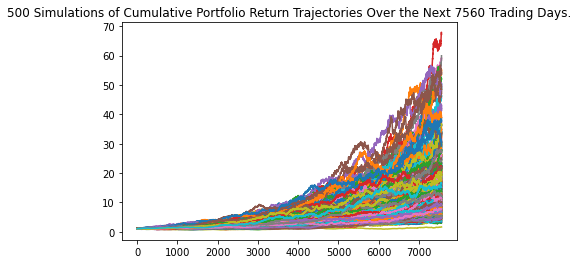

In [20]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = mc_30year.plot_simulation()
line_plot.get_figure().savefig("mc_30year_sim_plot.png", bbox_inches='tight')

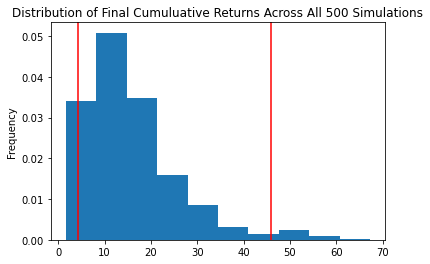

In [21]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

dist=plot = mc_30year.plot_distribution()

### Retirement Analysis

In [22]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = mc_30year.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!

print(tbl)

count           500.000000
mean             15.970487
std              10.145111
min               1.625110
25%               8.722030
50%              13.671854
75%              20.117885
max              67.292031
95% CI Lower      4.343700
95% CI Upper     45.801219
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [23]:
# Set initial investment

initial_investment = 20000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $86874.0 and $916024.38


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [24]:
# Set initial investment
initial_investment = 20000 * 1.5
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $130310.99 and $1374036.58


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [25]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

mc_5year = MCSimulation(
portfolio_data = df_stock_data,
weights= [.50, .50],
num_simulation = 500,
num_trading_days = 252*5
)


In [26]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

mc_5year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000266,1.015658,0.993279,1.000131,0.983482,0.999052,0.988708,0.993552,0.996621,0.992805,...,0.999166,0.995313,0.991341,1.001453,0.992945,1.007996,1.002119,0.986565,0.997758,0.995551
2,0.992766,1.013391,1.000206,0.998011,0.975434,1.000919,0.987580,0.980999,0.996073,0.992861,...,0.998960,0.993896,0.990943,1.017398,0.995283,1.016067,1.001314,0.984163,1.012980,0.998353
3,0.993709,1.011056,0.996750,1.012396,0.978368,0.996932,0.974542,0.981698,0.986655,0.994393,...,0.992875,0.994747,0.983855,1.028847,1.001127,1.013979,1.001255,0.986031,0.998789,1.005302
4,0.985291,1.000662,0.985669,1.014226,0.986266,1.004662,0.966697,0.971804,0.984376,0.989447,...,0.989783,0.984091,0.983560,1.032633,1.011330,1.003312,0.996934,0.983476,1.000599,1.000201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.592582,1.628258,1.267725,1.556508,1.801270,2.241965,1.436678,1.335249,1.529372,1.165458,...,1.792646,2.029099,1.463196,2.149064,1.929987,1.308230,2.606467,2.199914,1.753912,1.632187
1257,1.587511,1.635091,1.270759,1.554353,1.809545,2.245078,1.407521,1.342497,1.545968,1.149932,...,1.799774,2.040113,1.460748,2.173608,1.927550,1.313602,2.595255,2.207798,1.771069,1.639558
1258,1.564879,1.640932,1.277247,1.564911,1.810054,2.237166,1.427020,1.336244,1.546858,1.151590,...,1.778834,2.034744,1.467960,2.176035,1.909355,1.326487,2.592621,2.205255,1.777759,1.633162
1259,1.566042,1.652171,1.265955,1.563740,1.819536,2.231734,1.431267,1.333350,1.544791,1.156641,...,1.784219,2.054065,1.471454,2.149783,1.905945,1.319160,2.602972,2.207879,1.785069,1.646376


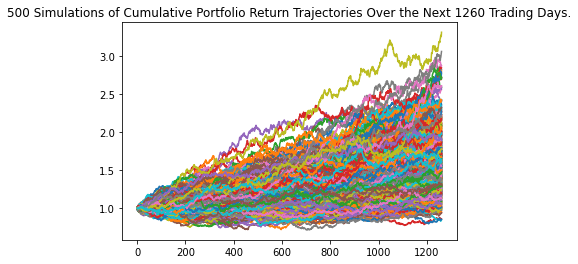

In [27]:
# Plot simulation outcomes
# YOUR CODE HERE!
mc_5year.portfolio_data.head()
line_plot = mc_5year.plot_simulation()
line_plot.get_figure().savefig("mc_5year_sim_plot.png", bbox_inches='tight')

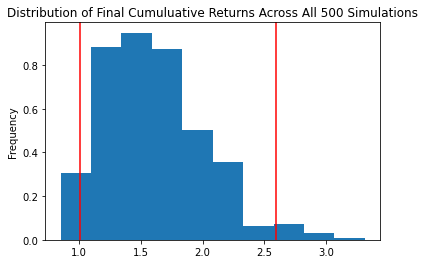

In [28]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dt=plot= mc_5year.plot_distribution()

In [29]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
mc_5year.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.608895
std               0.403278
min               0.848342
25%               1.309953
50%               1.552621
75%               1.848441
max               3.315865
95% CI Lower      1.003585
95% CI Upper      2.596999
Name: 1260, dtype: float64

In [31]:
# Set initial investment
# YOUR CODE HERE!
investment = 50000
ci_lower_five = round(tbl[8]*investment,2)
ci_upper_five = round(tbl[9]*investment,2)

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $50000 in the portfolio over the next 5 years will end within in the range of $217184.99 and $2290060.96


### Ten Years Retirement Option

In [32]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!


mc_10year = MCSimulation(
portfolio_data = df_stock_data,
weights= [.50, .50],
num_simulation = 500,
num_trading_days = 252*10
)


In [34]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

mc_10year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991724,0.997985,0.995176,0.993750,0.998709,1.010925,0.997194,1.001630,0.996805,1.006773,...,0.995116,1.006448,0.998541,0.983532,0.998877,1.005549,1.000519,1.000093,1.005682,0.989316
2,0.984080,0.996005,0.990200,0.997641,1.001332,1.016576,1.007913,0.993008,0.994916,1.014838,...,0.997505,1.020688,0.997897,0.989171,0.988711,1.007990,1.006240,1.006174,1.007084,1.000600
3,0.983016,0.997498,0.994726,0.991919,1.002318,1.008518,1.001976,0.991907,1.000510,1.010596,...,1.008025,1.029396,0.995332,0.987378,0.989459,1.009626,0.995853,1.011436,1.001020,1.016852
4,0.979532,0.990356,0.993742,0.989188,1.007001,1.004002,1.001133,0.990597,1.003732,1.005468,...,1.011949,1.031097,1.001738,0.976259,0.986773,1.013859,0.991830,1.014326,0.996829,1.007214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.085743,4.706499,1.242659,2.253278,2.283031,1.315964,2.293730,3.410926,3.578615,1.910753,...,3.020678,2.142026,3.126278,2.381122,2.445904,2.048416,3.022226,2.775402,1.715064,1.467534
2517,2.064164,4.716912,1.254800,2.286331,2.303670,1.306992,2.312000,3.421954,3.586725,1.935128,...,3.013320,2.127883,3.174875,2.377074,2.485043,2.029109,3.041915,2.763870,1.708491,1.482317
2518,2.059369,4.727912,1.249758,2.273803,2.322966,1.300409,2.291424,3.419059,3.562595,1.945908,...,3.011605,2.135680,3.190420,2.363183,2.498136,2.014201,3.014005,2.752491,1.723690,1.478489
2519,2.068130,4.726094,1.247384,2.257338,2.313951,1.301733,2.304539,3.436911,3.565623,1.953237,...,3.008618,2.134649,3.198528,2.340505,2.497835,1.983539,2.986669,2.731048,1.731373,1.494261


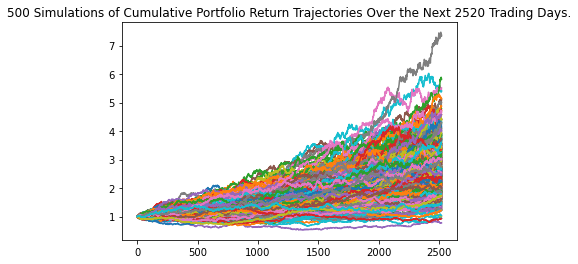

In [35]:
# Plot simulation outcomes
# YOUR CODE HERE!

mc_10year.portfolio_data.head()
line_plot = mc_10year.plot_simulation()
line_plot.get_figure().savefig("mc_10year_sim_plot.png", bbox_inches='tight')

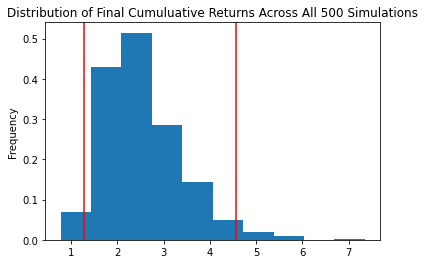

In [36]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

dt=plot= mc_10year.plot_distribution()

In [38]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl2 = mc_10year.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!

print(tbl2)

count           500.000000
mean              2.542277
std               0.847593
min               0.776617
25%               1.931315
50%               2.424403
75%               2.979276
max               7.346977
95% CI Lower      1.282961
95% CI Upper      4.572217
Name: 2520, dtype: float64


In [40]:
# Set initial investment
# YOUR CODE HERE!
investment_10y = 30000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

ci_lower_10 = round(tbl[8] * 30000,2)

ci_upper_10 = round(tbl[9] * 30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${investment_10y} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_10} and ${ci_upper_10}")

There is a 95% chance that an initial investment of $30000 in the portfolio over the next 10 years will end within in the range of $130310.99 and $1374036.58
